# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
symbol = 'OIH'
capital = 10000
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, period)
s.run()

Retrieve log DataFrames

In [6]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [7]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total
125,2016-11-29,29.56,2016-11-30,32.70,3.14,1968.78,627,10530.92
126,2016-12-14,34.06,2017-01-03,34.08,0.02,12.04,602,10542.96
127,2017-01-13,33.96,2017-01-25,34.86,0.90,543.60,604,11086.56
128,2017-01-30,33.11,2017-02-14,33.74,0.63,400.68,636,11487.24
129,2017-02-17,32.34,2017-03-01,32.93,0.59,391.76,664,11879.00
130,2017-03-03,32.03,2017-03-29,30.75,-1.28,-874.24,683,11004.76
131,2018-01-29,28.09,2018-02-16,24.38,-3.71,-2771.37,747,8233.39
132,2018-05-03,26.87,2018-05-07,27.33,0.46,311.88,678,8545.27
133,2018-05-24,28.17,2018-06-27,26.44,-1.73,-1138.34,658,7406.93
134,2018-07-16,26.00,2018-07-27,25.65,-0.35,-234.15,669,7172.78


In [8]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2019-12-09,17172.78,17172.78,17172.78,0,17172.78,-
2019-12-10,17172.78,17172.78,17172.78,0,17172.78,-
2019-12-11,17172.78,17172.78,17172.78,0,17172.78,-
2019-12-12,17172.78,17172.78,17172.78,0,17172.78,-
2019-12-13,17172.78,17172.78,17172.78,0,17172.78,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                  2001-12-13
end                                                    2019-12-13
beginning_balance                                           10000
ending_balance                                           17172.78
total_net_profit                                          7172.78
gross_profit                                             46559.71
gross_loss                                              -39386.93
profit_factor                                                1.18
return_on_initial_capital                                   71.73
annual_return_rate                                           3.05
trading_period                           18 years 0 months 0 days
pct_time_in_market                                          24.34
total_num_trades                                              135
trades_per_year                                              7.50
num_winning_trades                                             94
num_losing

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2001-12-13 00:00:00 BUY  539 OIH @ 18.55
2019-12-13 00:00:00 SELL 539 OIH @ 12.88


Plot Equity Curves: Strategy vs Benchmark

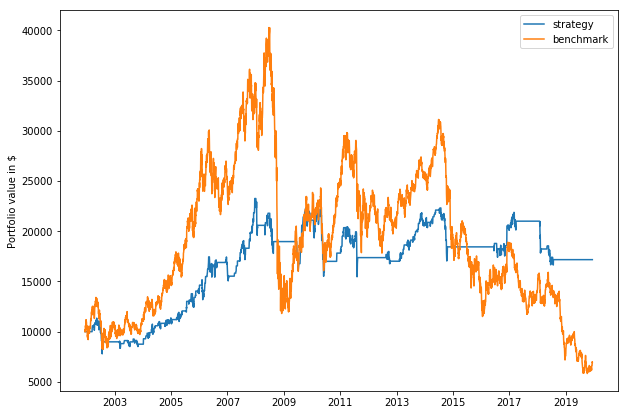

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

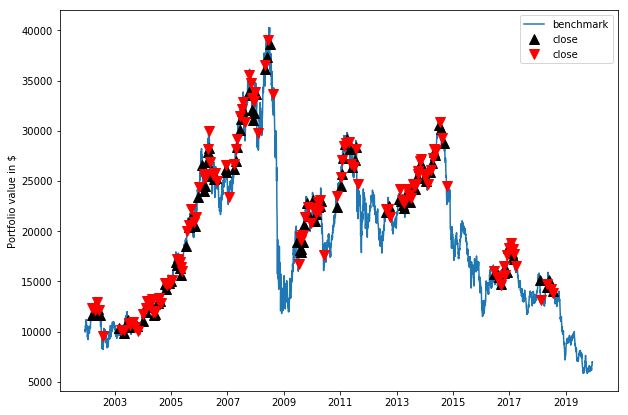

In [12]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,3.05,-2.01
max_closed_out_drawdown,-33.52,-85.52
drawdown_annualized_return,-10.99,42.59
drawdown_recovery,-3.63,-11.29
best_month,22.80,30.69
worst_month,-29.57,-47.40
sharpe_ratio,0.27,0.12
sortino_ratio,0.20,0.17
monthly_std,4.19,8.95


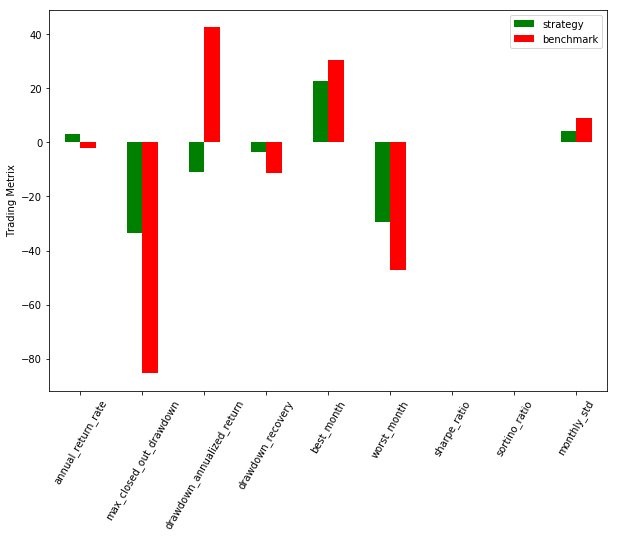

In [13]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, *metrics)
df

In [14]:
returns = dbal['close']
returns.tail()

date
2019-12-09   17172.78
2019-12-10   17172.78
2019-12-11   17172.78
2019-12-12   17172.78
2019-12-13   17172.78
Name: close, dtype: float64

In [15]:
benchmark_returns = benchmark.dbal['close']
benchmark_returns.tail()

date
2019-12-09   6658.20
2019-12-10   6674.37
2019-12-11   6792.95
2019-12-12   7008.55
2019-12-13   6941.18
Name: close, dtype: float64

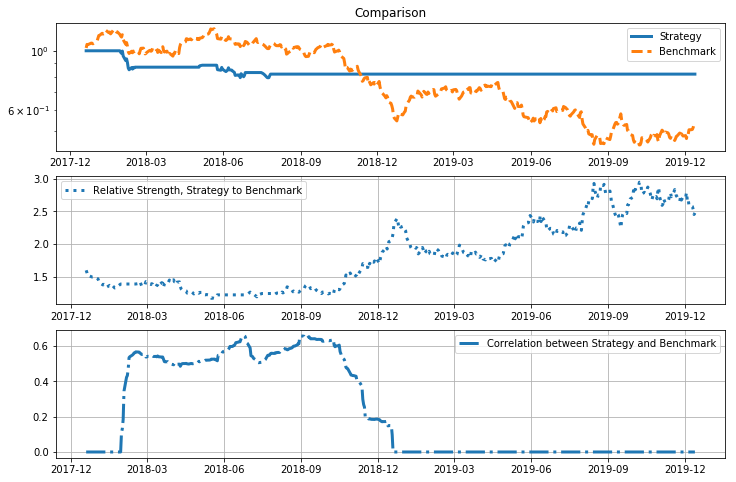

In [16]:
pf.prettier_graphs(returns, benchmark_returns, label1='Strategy', label2='Benchmark', points_to_plot=500)